# Find Nova Her 2021

This tutorial gives an example of downloading a short interval of data to try to detect and then localize a new source of gamma rays that is not in the catalog.

There was a new nova discovered on June 11, 2021. Let's go look for it.
[Gamma-ray Discovery Astronomer's Telegram](https://www.astronomerstelegram.org/?read=14705)
[Erratum](https://www.astronomerstelegram.org/?read=14707)
[Optical discovery and follow up in CBAT Notices](http://www.cbat.eps.harvard.edu/unconf/followups/J18573095+1653396.html?fbclid=IwAR3ldaU1mk8-P9qfjmwJ6_cxZdXgeCoh-YaqVzasIouk4NMfkRZtujnV2VU)

## Steps

1) Download data

2) Make configuration file

3) Set up analysis work flow (in this case the interactive jupyter notebook, but you can run fermipy in scripts, too.

4) check initial optimation and decide how to adjust the model for the fit

5) Run initial likelihood fit and examine results

#### Data

You can download the data from the LAT data server. I selected data from June 10 to the most recent data available (June 15). I downloaded a 20 deg region. This is larger than what I will analyze in this tutorial, but it will leave options to look lower energies, where the point spread function is broader, later if I like. For the same reason, I downloaded energies from 30 MeV to 300 GeV even though I intend to start by looking at 100 MeV to 100 GeV. 
I downloaded data for a postion RA, Dec = 18 57 00, +16 53 00 (284.25, 16.8833), a less precise position than available from the optical observations, because the the region is big and only needs to be approximately centered on my source of interest.


### Import packages and utilities

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
ls

config.yaml  data/  FindNHer2021.ipynb


## Import the package

In [3]:
from fermipy.gtanalysis import GTAnalysis

## Setup the object and load in the config file
We are reading in the configuration file here and configuring the analysis


In [4]:
gta = GTAnalysis('config.yaml',logging={'verbosity' : 3})

2022-06-03 22:50:41 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.1.1 
ScienceTools version 2.1.25


## Run the setup step

This step will load any precomputed files (livetime, exposure, source maps).  If the files don't already exist, will create them.  It also sets up the likelihood method so that we can do a fit to a model of the region.  

In [5]:
gta.setup()

2022-06-03 22:50:49 INFO    GTAnalysis.setup(): Running setup.
2022-06-03 22:50:49 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2022-06-03 22:50:49 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2022-06-03 22:50:49 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=/data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/evfile_00.txt outfile=/data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/ft1_00.fits ra=284.25 dec=16.8833 rad=7.5710678118654755 tmin=645196187.0 tmax=645448376.0 emin=100.0 emax=100000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=4 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2022-06-03 22:50:49 INFO    GTBinnedAnalysis.run_gtapp(): This is gtselect version HEAD
2022-06-03 22:50:49 INFO    GTBinnedAnalysis.run_gtapp(): Applying filter string: ((EVENT_CLASS&o200) != o0) && angsep(RA,DEC,284.25,16.8833) < 7.571067812 && ((EVENT_TYPE&o4) != o0) && 100

2022-06-03 22:51:30 INFO    GTBinnedAnalysis.run_gtapp(): This is gtsrcmaps version HEAD
2022-06-03 22:51:30 INFO    GTBinnedAnalysis.run_gtapp(): ResponseFunctions::load: IRF used: P8R3_SOURCE_V3 (PSF)
2022-06-03 22:51:30 INFO    GTBinnedAnalysis.run_gtapp(): event_types:  2
2022-06-03 22:51:34 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named NHer2021
2022-06-03 22:51:34 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1856.5+1735
2022-06-03 22:51:34 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1859.8+1545
2022-06-03 22:51:34 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1906.1+1651
2022-06-03 22:51:34 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1845.0+1613
2022-06-03 22:51:34 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1844.4+1547
2022-06-03 22:51:34 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1912.0+1612
2022-06-03 22:51:34 INFO    GTBinnedAnalysis.r

2022-06-03 22:51:49 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1920.7+1334 25....................!
2022-06-03 22:51:50 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1920.9+1408 25....................!
2022-06-03 22:51:50 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1921.1+1930 25....................!
2022-06-03 22:51:51 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1922.2+2314 25....................!
2022-06-03 22:51:51 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1922.4+1453 25....................!
2022-06-03 22:51:52 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1922.7+1428 25....................!
2022-06-03 22:52:21 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1923.2+1408e 25....................!
2022-06-03 22:52:21 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1924.3+1601 25....................!

2022-06-03 22:55:37 INFO    GTBinnedAnalysis.run_gtapp(): Finished gtexpcube2. Execution time: 8.82 s
2022-06-03 22:55:37 INFO    GTBinnedAnalysis.run_gtapp(): Running gtexpcube2.
2022-06-03 22:55:37 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtexpcube2 infile=/data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/ltcube_01.fits cmap=none outfile=/data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/bexpmap_roi_01.fits irfs="P8R3_SOURCE_V3" evtype=8 edisp_bins=0 nxpix=100 nypix=100 binsz=0.1 coordsys="CEL" xref=284.25 yref=16.8833 axisrot=0.0 proj="CAR" ebinalg="LOG" emin=100.0 emax=100000.0 enumbins=24 ebinfile="NONE" hpx_ordering_scheme="RING" hpx_order=6 bincalc="EDGE" ignorephi=no thmax=180.0 thmin=0.0 table="EXPOSURE" chatter=3 clobber=yes debug=no mode="ql"
2022-06-03 22:55:37 INFO    GTBinnedAnalysis.run_gtapp(): This is gtexpcube2 version HEAD
2022-06-03 22:55:37 INFO    GTBinnedAnalysis.run_gtapp(): ResponseFunctions::load: IRF used: P8R3_SOURCE_V

2022-06-03 22:55:48 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1844.4+1547 25....................!
2022-06-03 22:55:48 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1845.0+1613 25....................!
2022-06-03 22:55:49 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1856.5+1735 25....................!
2022-06-03 22:55:49 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1857.2+0941 25....................!
2022-06-03 22:55:50 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1859.0+2329 25....................!
2022-06-03 22:55:50 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1859.8+1545 25....................!
2022-06-03 22:55:51 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1906.1+1651 25....................!
2022-06-03 22:55:51 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1908.9+2103 25....................!


2022-06-03 22:59:07 INFO    GTBinnedAnalysis.run_gtapp(): This is gtbin version HEAD
2022-06-03 22:59:08 INFO    GTBinnedAnalysis.run_gtapp(): Finished gtbin. Execution time: 1.15 s
2022-06-03 22:59:08 INFO    GTBinnedAnalysis.run_gtapp(): Running gtexpcube2.
2022-06-03 22:59:08 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtexpcube2 infile=/data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/ltcube_02.fits cmap=none outfile=/data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/bexpmap_02.fits irfs="P8R3_SOURCE_V3" evtype=16 edisp_bins=-1 nxpix=360 nypix=180 binsz=1.0 coordsys="CEL" xref=0.0 yref=0.0 axisrot=0.0 proj="CAR" ebinalg="LOG" emin=100.0 emax=100000.0 enumbins=24 ebinfile="NONE" hpx_ordering_scheme="RING" hpx_order=6 bincalc="EDGE" ignorephi=no thmax=180.0 thmin=0.0 table="EXPOSURE" chatter=3 clobber=yes debug=no mode="ql"
2022-06-03 22:59:09 INFO    GTBinnedAnalysis.run_gtapp(): This is gtexpcube2 version HEAD
2022-06-03 22:59:09 INFO    GTBinne

2022-06-03 22:59:25 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1824.7+2403 25....................!
2022-06-03 22:59:25 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1827.5+1141 25....................!
2022-06-03 22:59:26 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1827.5+2015 25....................!
2022-06-03 22:59:26 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1830.0+1324 25....................!
2022-06-03 22:59:27 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1835.5+1349 25....................!
2022-06-03 22:59:27 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1836.1+1143 25....................!
2022-06-03 22:59:28 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1836.5+1948 25....................!
2022-06-03 22:59:28 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J1837.3+1052 25....................!


2022-06-03 23:02:22 INFO    GTBinnedAnalysis.run_gtapp(): Working on file /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/SC00.fits
2022-06-03 23:02:30 INFO    GTBinnedAnalysis.run_gtapp(): .....................!
2022-06-03 23:02:55 INFO    GTBinnedAnalysis.run_gtapp(): Finished gtltcube. Execution time: 33.68 s
2022-06-03 23:02:56 INFO    GTBinnedAnalysis.run_gtapp(): Running gtbin.
2022-06-03 23:02:56 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtbin evfile=/data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/ft1_03.fits scfile=/data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/SC00.fits outfile=/data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/ccube_03.fits algorithm="ccube" ebinalg="LOG" emin=100.0 emax=100000.0 enumbins=24 denergy=0.0 ebinfile=NONE tbinalg="LIN" tstart=0.0 tstop=0.0 dtime=0.0 tbinfile=NONE snratio=0.0 lcemin=0.0 lcemax=0.0 nxpix=100 nypix=100 binsz=0.1 coordsys="CEL" xref=284.25 yref=16.8833 a

2022-06-03 23:03:12 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1913.3+1019
2022-06-03 23:03:12 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1837.3+1052
2022-06-03 23:03:12 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1827.5+2015
2022-06-03 23:03:12 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1912.7+0957
2022-06-03 23:03:12 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1914.7+1012
2022-06-03 23:03:12 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1925.7+1227
2022-06-03 23:03:12 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1922.2+2314
2022-06-03 23:03:12 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1919.1+2354
2022-06-03 23:03:12 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1827.5+1141
2022-06-03 23:03:12 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J1824.7+2403
2022-06-03 23:03:12 

#### Analysis Tip 

This part of the sky lies toward the Galactic plane and has a very large number of sources nearby. By using a catalog based on 12 years of data, we add a very large number of faint, undetected sources to this short, few day selection. Most of them will be deleted when we filter the model for minimum TS and npred values. 

An alternative strategy for such a short analysis is to make a very simple custom model that includes only the brightest nearby sources from the 4FGL-DR3 catalog along with the interstellar emission and isotropic models. If there is anything missed in this simple model, we can check and add it in later steps.

The computing resources needed for binned likelihood analysis scale with the number of sources in the model and the number of bins used. Sometimes when things aren't working well, it is important to simplify the anlaysis in some way to figure out what is going on. 

## Optimize the Model of the Region of Interest

The optimize step runs a loop over the model components in the region of interest (ROI) and fits the spectral normalization and shape parameters for each source. This creates an initial estimate for the model for the region. Later, we will refine it. We picked up default shapes and parameter values in the setup step from the 4FGL catalog. That is why we listed that catalog in ```config.yaml```. This method computes a Test Statistic (TS) and a predicted photon count for each of the 4FGL sources using the optimized fit parameters. This can be useful for identifying weak sources that should have their parameters fixed or that could be removed from the model if they are way too faint to detect in this data set. Recall that the 4FGL-DR3 catalog contains sources detected using 12 years of data. Here we are using only a few months.

In [6]:
opt1 = gta.optimize()

2022-06-03 23:06:47 INFO    GTAnalysis.optimize(): Starting


Joint fit  ['galdiff', 'isodiff', 'NHer2021']
Fitting shape galdiff TS:    401.525


2022-06-03 23:06:51 INFO    GTAnalysis.optimize(): Finished
2022-06-03 23:06:51 INFO    GTAnalysis.optimize(): LogLike: -5011.651642 Delta-LogLike: 4.645716
2022-06-03 23:06:51 INFO    GTAnalysis.optimize(): Execution time: 4.25 s


We saved the output of this step in a variable called _opt 1_.  It's just a python dictionary.

In [7]:
opt1

{'loglike0': -5016.297357738436,
 'loglike1': -5011.651641565165,
 'dloglike': 4.645716173271467,
 'config': {'npred_threshold': 1.0,
  'npred_frac': 0.95,
  'shape_ts_threshold': 25.0,
  'max_free_sources': 5,
  'skip': [],
  'optimizer': {'optimizer': 'MINUIT',
   'tol': 0.001,
   'max_iter': 100,
   'init_lambda': 0.0001,
   'retries': 3,
   'min_fit_quality': 2,
   'verbosity': 0}}}

We can also look at a summary of the results using the ```print_roi()``` function:

In [8]:
gta.print_roi()

2022-06-03 23:07:06 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
NHer2021            PointSource    PowerLaw          0.000     18.32        34.0
4FGL J1856.5+1735   PointSource    PowerLaw          0.724      0.34         6.6
4FGL J1859.8+1545   PointSource    PowerLaw          1.316       nan         0.9
4FGL J1906.1+1651   PointSource    LogParabola       2.192       nan         0.2
4FGL J1845.0+1613   PointSource    PowerLaw          2.940     -0.00         0.0
4FGL J1844.4+1547   PointSource    LogParabola       3.199      0.03         0.9
4FGL J1912.0+1612   PointSource    PowerLaw          3.678      0.09         3.2
4FGL J1908.9+2103   PointSource    PLSuperExpCuto    5.043       nan         0.5
4FGL J1912.5+1320   PointSource    LogParabola       5.151      1.68        11.1
4FGL J1836.5+1948   PointSource    PowerLaw          5.6

### Delete sources that are not detected

As suspected above, almost all of these sources are too faint to include in a fit of a few days of data. These will cause a lot of trouble for the fit if I try to fit their spectral parameters. Let's remove them and speed everything up a lot. Notice that using npred < 1 will remove all those troublesome sources with TS = nan (not a number).

But wait, the isotropic template is only at TS = 1.25. I don't want to get rid of it, but may want to think about fixing the normalization when I run the fit later to remove ambiguity with the Galactic model. This is often done for short interval analysis where there is not enough information to distinguish the Galactic and isotropic components.

For this example, I'll loosen up the filtering on keeping model sources compared to the 3C 279 example and choose to delete sources with TS = 0 and npred < 1.

In [9]:
deleted_sources = gta.delete_sources(minmax_ts=[-1,0])

2022-06-03 23:07:23 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1845.0+1613
2022-06-03 23:07:23 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1920.9+1408
2022-06-03 23:07:23 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1922.7+1428


In [10]:
deleted_sources = gta.delete_sources(minmax_npred=[0,3])

2022-06-03 23:07:30 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1859.8+1545
2022-06-03 23:07:30 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1906.1+1651
2022-06-03 23:07:30 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1844.4+1547
2022-06-03 23:07:30 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1908.9+2103
2022-06-03 23:07:30 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1836.5+1948
2022-06-03 23:07:30 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1835.5+1349
2022-06-03 23:07:30 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1921.1+1930
2022-06-03 23:07:31 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1922.4+1453
2022-06-03 23:07:31 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1920.7+1334
2022-06-03 23:07:31 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1924.3+1601
2022-06-03 23:07:31 INFO    GTAnalysis.delete_source(): Deleting source 4FGL J1859.0+2329
2022-06-03

In [11]:
gta.print_roi()

2022-06-03 23:07:52 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
NHer2021            PointSource    PowerLaw          0.000     18.32        34.0
4FGL J1856.5+1735   PointSource    PowerLaw          0.724      0.34         6.6
4FGL J1912.0+1612   PointSource    PowerLaw          3.678      0.09         3.2
4FGL J1912.5+1320   PointSource    LogParabola       5.151      1.68        11.1
4FGL J1919.4+1313   PointSource    LogParabola       6.544      0.07         3.5
4FGL J1915.3+1149   PointSource    LogParabola       6.736      0.42         5.6
4FGL J1923.2+1408e  SpatialMap     LogParabola       6.895      0.95        15.2
isodiff             ConstantValue  FileFunction      -----      1.25        46.5
galdiff             MapCubeFunctio PowerLaw          -----   1328.51       556.4



### Free source parameters in the model

When sources are close to our target source, we need to let the fit vary their model parameters. To find the best fit for the target source, we consider the overlap of the nearby sources because of the width and tails of the LAT point spread function. We have to find the best fit parameters for nearby sources as well as the target source to have a good model of the region. 

In the next step, we will free the spectral parameters for sources close to the target, within 3 deg of the center of our region of interest (this could be made larger or smaller depending on the analysis and region), and do a more detailed fit for that inner circle of the region. The parameters will be fixed to the optimized value from above for sources that are farther away and have less influence on the target location. In this example we will leave all the spectral shapes fixed and only vary the normalization parameters. In same cases, we might want to allow some shapes to vary, too.

It is also important to leave parameters free for any relatively high TS sources in the region and to leave parameters free for the isotropic and interstellar emission (Galactic diffuse) models. The underlying need is that we must give the fit enough degrees of freedom to find the best representation of the data given our model. Ideally, we would simultaneously fit the entire sky, but that presents many difficulties and for a single source analysis, this approach is sufficient. 

In [12]:
# Free Normalization of all Sources within 3 deg of ROI center
gta.free_sources(distance=3.0,pars='norm')

# Free sources with TS > 10
gta.free_sources(minmax_ts=[10,None],pars='norm')

# Free all parameters of isotropic and galactic diffuse components
gta.free_source('galdiff')
# gta.free_source('isodiff') Let's leave this fixed for this very short interval.

2022-06-03 23:08:12 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J1856.5+1735     : ['Prefactor']
2022-06-03 23:08:12 INFO    GTAnalysis.free_source(): Freeing parameters for isodiff               : ['Normalization']
2022-06-03 23:08:12 INFO    GTAnalysis.free_source(): Freeing parameters for galdiff               : ['Prefactor']
2022-06-03 23:08:12 INFO    GTAnalysis.free_source(): Freeing parameters for galdiff               : ['Index']


## Fit the refined model of the ROI

Now we will do the fit using our refined model of the region. We will save the results in the ```fit1``` variable.

In [13]:
fit1 = gta.fit()

2022-06-03 23:08:28 INFO    GTAnalysis.fit(): Starting fit.
2022-06-03 23:08:29 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   3 Status:   0
2022-06-03 23:08:29 INFO    GTAnalysis.fit(): LogLike:    -5011.638 DeltaLogLike:        0.237 


It looks like the fit returned successfully. That means that the minimization completed normally - a good thing. If the fit routine is struggling to find best-fit parameters for the model, it will complain.

In [14]:
gta.print_roi()

2022-06-03 23:08:38 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
NHer2021            PointSource    PowerLaw          0.000     14.93        29.7
4FGL J1856.5+1735   PointSource    PowerLaw          0.724      0.91        12.3
4FGL J1912.0+1612   PointSource    PowerLaw          3.678      0.09         3.2
4FGL J1912.5+1320   PointSource    LogParabola       5.151      1.68        11.1
4FGL J1919.4+1313   PointSource    LogParabola       6.544      0.07         3.5
4FGL J1915.3+1149   PointSource    LogParabola       6.736      0.42         5.6
4FGL J1923.2+1408e  SpatialMap     LogParabola       6.895      0.95        15.2
isodiff             ConstantValue  FileFunction      -----      1.82        57.5
galdiff             MapCubeFunctio PowerLaw          -----    343.03       555.7



In [15]:
print(gta.roi['NHer2021'])

Name           : NHer2021
Associations   : ['NHer2021']
RA/DEC         :    284.250/    16.883
GLON/GLAT      :     48.641/     6.417
TS             : 14.93
Npred          : 29.66
Flux           : 2.414e-07 +/- 1.08e-07
EnergyFlux     : 0.0001669 +/- 7.46e-05
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  2.416e-11 +/-   1.08e-11
b'Index'       :         -2 +/-        nan
b'Scale'       :       1000 +/-        nan


You can save the results (and reload them later which is really nice).  Note that this method saves plots in a fits file and the results of the fits in a numpy file in the data subdirectory of the working directory for this analysis.

In [16]:
gta.write_roi('fit1',make_plots=True)

2022-06-03 23:08:55 INFO    GTBinnedAnalysis.write_xml(): Writing /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/fit1_00.xml...
2022-06-03 23:08:55 INFO    GTBinnedAnalysis.write_xml(): Writing /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/fit1_01.xml...
2022-06-03 23:08:55 INFO    GTBinnedAnalysis.write_xml(): Writing /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/fit1_02.xml...
2022-06-03 23:08:55 INFO    GTBinnedAnalysis.write_xml(): Writing /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/fit1_03.xml...
2022-06-03 23:08:55 INFO    GTAnalysis.write_fits(): Writing /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/fit1.fits...
2022-06-03 23:09:05 INFO    GTAnalysis.write_roi(): Writing /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/fit1.npy...


Before we continue to examine the best fit results, let's fix the parameters for all of the sources.

In [17]:
fixed_sources = gta.free_sources(free=False)

2022-06-03 23:09:15 INFO    GTAnalysis.free_source(): Fixing parameters for NHer2021              : ['Prefactor']
2022-06-03 23:09:15 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J1856.5+1735     : ['Prefactor']
2022-06-03 23:09:15 INFO    GTAnalysis.free_source(): Fixing parameters for isodiff               : ['Normalization']
2022-06-03 23:09:15 INFO    GTAnalysis.free_source(): Fixing parameters for galdiff               : ['Prefactor', 'Index']


### Generate Residual Count Maps

A residual count map shows the unmodeled counts after we subtract the counts from the modeled sources from the counts in the data for the region. This can be positive or negative depending on whether the model underpredicts or overpredicts the counts in each spatial bin.

In [18]:
resid = gta.residmap('NHer 2021',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2022-06-03 23:09:23 INFO    GTAnalysis.residmap(): Generating residual maps
2022-06-03 23:09:23 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2022-06-03 23:09:28 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2022-06-03 23:09:28 INFO    GTAnalysis.residmap(): Finished residual maps
2022-06-03 23:09:35 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/NHer 2021_pointsource_powerlaw_2.00_residmap.npy
2022-06-03 23:09:35 INFO    GTAnalysis.residmap(): Execution time: 11.50 s


There is a handy helper function, ROIPlotter, that makes pretty skymaps.

In [19]:
from fermipy.plotting import ROIPlotter

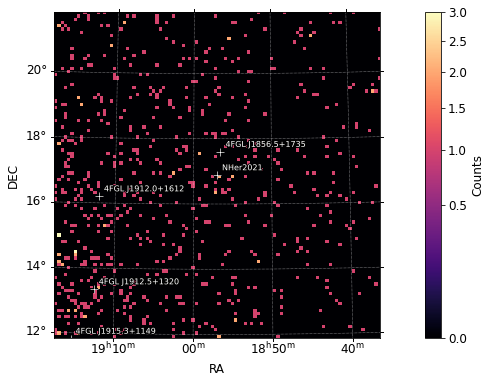

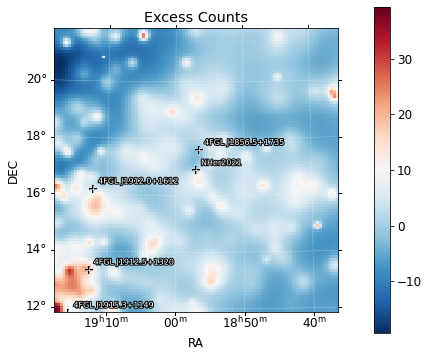

In [20]:
o = resid
fig = plt.figure(figsize=(14,6))
ROIPlotter(o['excess'],roi=gta.roi).plot(vmin=-200,vmax=200,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess Counts')
plt.show()

This is a quick diagnostic. If it looks reasonable, we should do better and go on to the TS map.

## Make a TS map to evaluate unmodeled emission 

This is a map made by adding a tentative point source source at each location in the map and then calculating the likelihood ratio between the previously optimized model and the best-fit model with the additional source at that location. Recall that the test statistic is defined as $TS = -2 \ln(L_0/L_s)$, where $L_0$ is the likelihood of the original model and $L_s$ is the likelihood of the model with the additional source. Adding a source can only *improve* the model or leave the likelihood unchanged (if the best-fit flux is 0), hence the $TS$ can not be negative.

In [21]:
tsmap = gta.tsmap('NHer 2021',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2022-06-03 23:09:59 INFO    GTAnalysis.tsmap(): Generating TS map
2022-06-03 23:10:05 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2022-06-03 23:10:26 INFO    GTAnalysis.tsmap(): Finished TS map
2022-06-03 23:10:34 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/NHer 2021_pointsource_powerlaw_2.00_tsmap.npy
2022-06-03 23:10:34 INFO    GTAnalysis.tsmap(): Execution time: 34.50 s


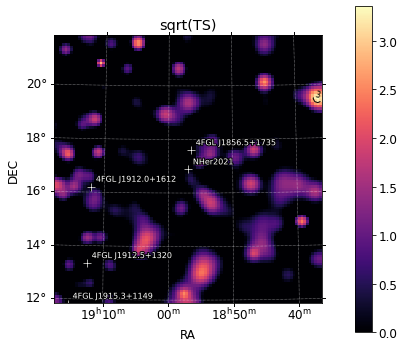

In [22]:
o = tsmap

fig = plt.figure(figsize=(6,6))
ROIPlotter(o['sqrt_ts'],roi=gta.roi).plot(vmin=0,vmax=5,levels=[3,5,7,9],subplot=111,cmap='magma')
plt.gca().set_title('sqrt(TS)')
plt.show()

We can play the same game again of excluding a source from the model and examining the TS map for that model.

In [23]:
tsmap_noNHer2021 = gta.tsmap('No NHer 2021',
                          model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                         exclude=['NHer2021'])

2022-06-03 23:11:05 INFO    GTAnalysis.tsmap(): Generating TS map
2022-06-03 23:11:12 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2022-06-03 23:11:34 INFO    GTAnalysis.tsmap(): Finished TS map
2022-06-03 23:11:42 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/No NHer 2021_pointsource_powerlaw_2.00_tsmap.npy
2022-06-03 23:11:42 INFO    GTAnalysis.tsmap(): Execution time: 36.40 s


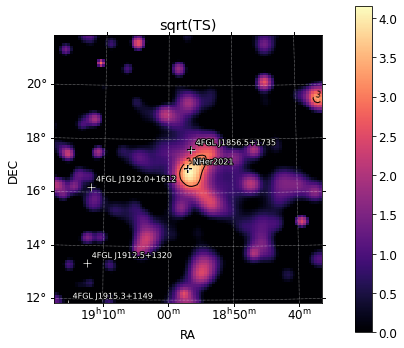

In [24]:
o = tsmap_noNHer2021

fig = plt.figure(figsize=(6,6))
ROIPlotter(o['sqrt_ts'],roi=gta.roi).plot(vmin=0,vmax=5,levels=[3,5,7,9],subplot=111,cmap='magma')
plt.gca().set_title('sqrt(TS)')
plt.show()

Hm. In my model I assumed the optical location for the source. It looks there is ok agreement bewteen the peak in the TS map and the optical position for the nova. If I drop the assumption about where this source is located, I wonder what position is preferred using the gamma-ray data?

It turns out there is a method we can use localize a source. The method first uses the TS map peak as a course location and then scans using Likelihood fits for different spatial coordinates for the source model to find the position that best matches the gamma-ray data. Let's do that.

In [25]:
loc = gta.localize('NHer2021', make_plots=True)

2022-06-03 23:11:42 INFO    GTAnalysis.localize(): Running localization for NHer2021
2022-06-03 23:11:54 INFO    GTAnalysis._localize(): Localization succeeded.
2022-06-03 23:11:54 INFO    GTAnalysis._localize(): Updating source NHer2021 to localized position.
2022-06-03 23:11:54 INFO    GTAnalysis.delete_source(): Deleting source NHer2021
2022-06-03 23:11:54 INFO    GTAnalysis.add_source(): Adding source NHer2021
2022-06-03 23:12:01 INFO    GTAnalysis._localize(): Localization completed with new position:
(  ra, dec) = (  284.1978 +/-   0.1606,   16.7333 +/-   0.1708)
(glon,glat) = (   48.4837 +/-   0.1688,    6.3948 +/-   0.1627)
offset =   0.1581 r68 =   0.2512 r95 =   0.4054 r99 =   0.5026
2022-06-03 23:12:01 INFO    GTAnalysis._localize(): LogLike:    -5010.382 DeltaLogLike:        1.256
2022-06-03 23:12:01 INFO    GTAnalysis.localize(): Finished localization.
2022-06-03 23:12:06 WARNING GTAnalysis.localize(): Saving TS maps in .npy files is disabled b/c of incompatibilities in py

In [26]:
print(loc['ra'],loc['dec'],loc['pos_r68'],loc['pos_r95'])

284.1977891937663 16.73329334450699 0.2511883660978332 0.4053675817805288


![Likelihood Surface Scan](data/nher2021_localize_peak.png)
![TS Scan](data/nher2021_localize.png)

The top plot shows the course position, generate using a Likelihood test statistic map.
The bottom plot shows the refined position and contours from running the likelihood test in a smaller box around the course location. See the [fermipy documentation](https://fermipy.readthedocs.io/en/latest/advanced/localization.html).

Good news! The position of the nova is within the 68% error region for the best-fit position for the gamma-ray source. We didn't find a know catalog source at this position and so a new gamma-ray source appearing at the same time as the nova discovery suggests they have the same origin.

## Make a spectral energy density plot for the target source

Let's look at the SED plot.

In [27]:
sed = gta.sed('NHer2021')

2022-06-03 23:12:36 INFO    GTAnalysis.sed(): Computing SED for NHer2021
2022-06-03 23:12:36 INFO    GTAnalysis._make_sed(): Fitting SED
2022-06-03 23:12:36 INFO    GTAnalysis.free_source(): Freeing parameters for NHer2021              : ['Prefactor']
2022-06-03 23:12:38 INFO    GTAnalysis.sed(): Finished SED
2022-06-03 23:12:44 INFO    GTAnalysis.sed(): Execution time: 8.40 s


In [28]:
source = gta.roi.get_source_by_name('NHer2021')

In [29]:
E = np.array(source['model_flux']['energies'])
dnde = np.array(source['model_flux']['dnde'])
dnde_hi = np.array(source['model_flux']['dnde_hi'])
dnde_lo = np.array(source['model_flux']['dnde_lo'])

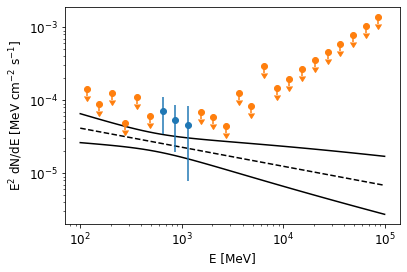

In [30]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
for i in range(len(sed['e_ctr'])):
    if (sed['ts'][i] > 4):
        plt.errorbar(sed['e_ctr'][i],
             sed['e2dnde'][i], 
             yerr=sed['e2dnde_err'][i], fmt ='o', color = 'tab:blue')
    else:
        plt.errorbar(np.array(sed['e_ctr'][i]),
         sed['e2dnde_ul95'][i], yerr=0.2*sed['e2dnde_ul95'][i], 
             fmt='o', uplims=True, color = 'tab:orange')
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()
    

This doesn't make for a very impressive spectrum. For this short interval and with the source not being extremely bright, we are signal limited. You can see that most of the signal is detected at the energies where the LAT effective area peaks, near 1 GeV (you can see this in effective area or acceptance performance plots). Recall that in the fit we did there were only about 35 predicted counts (npred) for the source. You can see this back at line 17, where we printed the fit dictionary for NHer 2021. It showed the best-fit parameters with errors from the likelihood fit and some related derived quantities.

We can save the fit results and plots from the SED method. 

In [31]:
gta.write_roi('fit2_sed',make_plots=True)

2022-06-03 23:13:07 INFO    GTBinnedAnalysis.write_xml(): Writing /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/fit2_sed_00.xml...
2022-06-03 23:13:07 INFO    GTBinnedAnalysis.write_xml(): Writing /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/fit2_sed_01.xml...
2022-06-03 23:13:07 INFO    GTBinnedAnalysis.write_xml(): Writing /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/fit2_sed_02.xml...
2022-06-03 23:13:07 INFO    GTBinnedAnalysis.write_xml(): Writing /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/fit2_sed_03.xml...
2022-06-03 23:13:07 INFO    GTAnalysis.write_fits(): Writing /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/fit2_sed.fits...
2022-06-03 23:13:18 INFO    GTAnalysis.write_roi(): Writing /data/Tutorials/fermi-summer-school/Advanced_Topics/FindSource/data/fit2_sed.npy...


## Summary



We found a faint possible signal from the nova position with a TS of 15. A check of the TS map and a localization test show that the field is well modelled and the best-fit position is consistent with the nova position from optical measurements. We can make a very limited spectrum for the source - the flux is only measurable at energies near the peak in LAT sensitivity. This wouldn't be compelling as an independent discovery, but it is information that can help constrain a multiwavelength model of the nova.